# Predicting the Sale Price of Bulldozers using Machine Learning

## 1. Problem Definition

> How well can i predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition:https://www.kaggle.com/competitions/bluebook-for-bulldozers/

There are 3 mains datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the  evaluation of this project, check:https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation


## 4. Features

Kaggle provides a data dictionary detailling all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/1nitu_Lybuhwswq64JOkc7ps6L6e96z5rWoey8cgIS9s/edit?usp=sharing



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns


pd.set_option("display.max_row", 111)
pd.set_option("display.max_column", 111)

In [3]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
(df.isna().sum()/df.shape[0]).sort_values()

SalesID                     0.000000
state                       0.000000
fiProductClassDesc          0.000000
fiBaseModel                 0.000000
fiModelDesc                 0.000000
ProductGroup                0.000000
saledate                    0.000000
datasource                  0.000000
ModelID                     0.000000
MachineID                   0.000000
SalePrice                   0.000000
YearMade                    0.000000
ProductGroupDesc            0.000000
Enclosure                   0.000809
auctioneerID                0.048791
Hydraulics                  0.200062
fiSecondaryDesc             0.340993
Coupler                     0.465277
Forks                       0.520921
ProductSize                 0.524851
Transmission                0.544444
Ride_Control                0.629928
MachineHoursCurrentMeter    0.642586
Drive_System                0.740520
Ripper                      0.740864
Undercarriage_Pad_Width     0.750626
Thumb                       0.752041
S

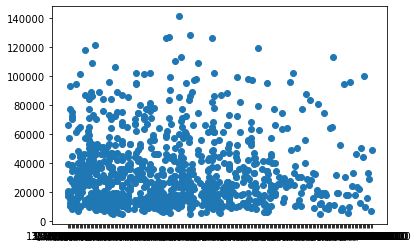

In [6]:
fig, ax = plt.subplots()

ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [7]:
df['saledate']

0         11/16/2006 0:00
1          3/26/2004 0:00
2          2/26/2004 0:00
3          5/19/2011 0:00
4          7/23/2009 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412698, dtype: object

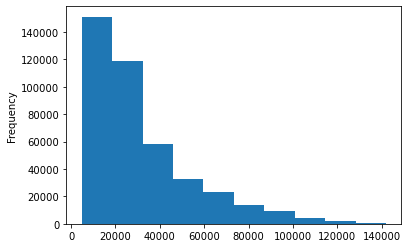

In [8]:
df.SalePrice.plot.hist();

### Parsing Dates

In [9]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False,
                parse_dates=["saledate"])

In [10]:
df["saledate"]

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

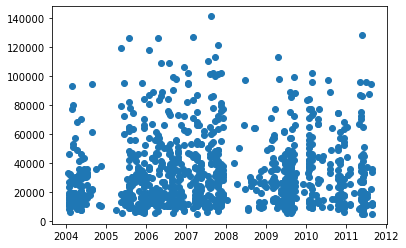

In [11]:
fig, ax = plt.subplots()

ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [12]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Sort DataFrame by saledate

In [13]:
df.sort_values(by=["saledate"], ascending=True, inplace=True)

In [14]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,D7G,D7,G,NaN,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,A62,A62,NaN,NaN,NaN,NaN,Wheel Loader - Unidentified,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,D3B,D3,B,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [15]:
df_tmp = df.copy()

# Add datetime parameters for `saledate` column

In [16]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.day_of_week
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.day_of_year

In [17]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,D7G,D7,G,NaN,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,A62,A62,NaN,NaN,NaN,NaN,Wheel Loader - Unidentified,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,D3B,D3,B,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [18]:
df_tmp.drop("saledate", axis=1, inplace=True)

In [19]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,D7,G,NaN,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,A62,NaN,NaN,NaN,NaN,Wheel Loader - Unidentified,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,D3,B,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


## 5. Modelling
Let's start to do some model-driven EDA.

In [19]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

ValueError: could not convert string to float: 'Low'

# Convert string to categories

One way i can all of my data into number is by converting them into pandas categories

https://pandas.pydata.org/pandas-docs/version/1.2.0/reference/general_utility_functions.html

In [20]:
pd.api.types.is_string_dtype(df_tmp['state'])

True

In [21]:
for column, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[column] = content.astype("category").cat.as_ordered()

In [22]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [23]:
df_tmp.to_csv('data/bluebook-for-bulldozers/train_tmp.csv', index=False)

In [24]:
df_tmp = pd.read_csv('data/bluebook-for-bulldozers/train_tmp.csv', low_memory=False)
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,D7,G,NaN,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,A62,NaN,NaN,NaN,NaN,Wheel Loader - Unidentified,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,D3,B,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


## Filling missing values

### Filling numerical missing values first

In [25]:
for column, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(column)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [26]:
df_tmp.isnull().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [27]:
# Check for which numeric columns have null values

for column, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(column)

auctioneerID
MachineHoursCurrentMeter


In [28]:
# Fill numeric rows with the madian

for column, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_tmp[column+"_is_missing"] = pd.isnull(content)
            
            # Fill missing numeric value with the median
            df_tmp[column] = content.fillna(content.median())

In [29]:
df_tmp.isnull().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

In [30]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,NaN,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,NaN,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31,False,True
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,NaN,D7G,D7,G,NaN,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31,False,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,NaN,A62,A62,NaN,NaN,NaN,NaN,Wheel Loader - Unidentified,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31,False,True
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,NaN,D3B,D3,B,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31,False,True


In [31]:
df_tmp.isna().sum().sort_values(ascending=False)/df_tmp.shape[0]

Enclosure_Type                         0.937041
Engine_Horsepower                      0.937041
Tip_Control                            0.937041
Pushblock                              0.937041
Blade_Extension                        0.937041
Blade_Width                            0.937041
Scarifier                              0.937014
Hydraulics_Flow                        0.891264
Grouser_Tracks                         0.891264
Coupler_System                         0.891024
fiModelSeries                          0.857845
Steering_Controls                      0.826697
Differential_Type                      0.826595
UsageBand                              0.821492
fiModelDescriptor                      0.818715
Backhoe_Mounting                       0.804428
Stick                                  0.803498
Turbocharged                           0.803498
Pad_Type                               0.803498
Blade_Type                             0.801610
Travel_Controls                        0

## Filling and turning categorical variables into numbers

In [32]:
# Check for  columns which aren't numeric

for column, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(column)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [33]:
# Turn categorical variables into numbers and fill missing

for column, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_tmp[column+"_is_missing"] = pd.isnull(content)
            
        # Turn categories into numbers and add +1
        df_tmp[column] = pd.Categorical(content).codes+1

In [34]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing,UsageBand_is_missing,fiModelDesc_is_missing,fiBaseModel_is_missing,fiSecondaryDesc_is_missing,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,1744,0,0,0,4,47,44,5,5,0,6,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,6,0,0,1989,1,17,1,17,False,True,True,False,False,True,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,559,0,0,0,0,60,9,6,6,0,6,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1989,1,31,1,31,False,True,True,False,False,True,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,713,59,0,0,2,50,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,6,0,0,1989,1,31,1,31,False,True,True,False,False,False,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,558,0,0,0,0,74,9,6,6,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1989,1,31,1,31,False,True,True,False,False,True,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,683,21,0,0,0,51,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,5,0,0,1989,1,31,1,31,False,True,True,False,False,False,True,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True


In [35]:
df_tmp.dtypes

SalesID                                  int64
SalePrice                              float64
MachineID                                int64
ModelID                                  int64
datasource                               int64
auctioneerID                           float64
YearMade                                 int64
MachineHoursCurrentMeter               float64
UsageBand                                 int8
fiModelDesc                              int16
fiBaseModel                              int16
fiSecondaryDesc                          int16
fiModelSeries                             int8
fiModelDescriptor                        int16
ProductSize                               int8
fiProductClassDesc                        int8
state                                     int8
ProductGroup                              int8
ProductGroupDesc                          int8
Drive_System                              int8
Enclosure                                 int8
Forks        

In [36]:
%%time

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

CPU times: user 23min 24s, sys: 1.32 s, total: 23min 25s
Wall time: 5min 56s


RandomForestRegressor(n_jobs=-1, random_state=42)

## Splitting data into train/validation sets

In [36]:
## Split data into training and validation

df_val = df_tmp[df_tmp.saleYear == 2012]

df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [37]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1),  df_val.SalePrice

## Building an evaluation function

In [38]:
# Create evaluation function(the comptetition uses RMSLE)

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
        Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels

def show_scores(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    scores = {"Training MAE":mean_absolute_error(y_train, train_preds),
              "Valid MAE":mean_absolute_error(y_valid, valid_preds),
              "Training RMSLE":rmsle(y_train, train_preds),
              "Valid RMSLE":rmsle(y_valid, valid_preds),
              "Training R^2":r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, valid_preds)}
    return scores

## Testing my model on a subset(to tune the hyperparameters)

In [40]:
# %%time

# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(n_jobs=-1,
#                              random_state=42)

# model.fit()

In [41]:
# Change max_sample value
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                              max_samples=10000)

In [42]:
%%time

model.fit(X_train, y_train)

CPU times: user 47 s, sys: 534 ms, total: 47.6 s
Wall time: 13.5 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [43]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

## Hyperparameter tuning with RandomizedSearchCV

In [44]:
%%time

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]

# Number of features to consider at every split
max_features = [0.5, 1, 'auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [3, 5, 10]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 20, num = 2)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 20, num = 2)]

# Method of selecting samples for training each tree
bootstrap = [True, False]

max_samples=[10000]


rf_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
                "max_samples":max_samples}


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(n_jobs=-1,
                             random_state=42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = rf_grid,
                               n_iter = 200, 
                               cv = 5, 
                               verbose=2)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=10; total time=   3.4s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=10; total time=   0.8s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=10; total time=   0.6s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=10; total time=   0.6s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=10; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END boots

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=60; total time=   6.2s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=60; total time=   6.0s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=60; total time=   6.0s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=60; total time=   6.1s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=60; total time=   6.2s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   2.9s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   2.8s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   2.9s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   2.8s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   2.9s
[CV] END bootstrap=False, max_depth=3, max_features=0.5, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=3, max_features=0.5, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=3, max_features=0.5, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=3, max_features=0.5, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=False, max_depth=3, max_features=0.5, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=3, max_features=auto, max_samples=10

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   3.0s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   2.9s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   2.9s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   2.8s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=60; total time=   2.8s
[CV] END bootstrap=False, max_depth=10, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=20; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=1, max_samples=10000, min_samp

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=40; total time=   2.1s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=40; total time=   2.0s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=40; total time=   2.0s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=40; total time=   2.0s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=40; total time=   2.0s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   7.2s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   6.9s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   6.9s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   6.9s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   6.8s
[CV] END bootstrap=False, max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, max_samples=10

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=50; total time=   2.4s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=50; total time=   2.4s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=50; total time=   2.4s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=50; total time=   2.4s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=50; total time=   2.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   1.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   1.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   1.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   1.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=70; total time=   1.7s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   1.3s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   1.4s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   1.3s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   1.3s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=10; total time=   1.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=50; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=50; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=50; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=50; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=50; total time=   1.4s
[CV] END bootstrap=False, max_depth=10, max_features=1, max_samples=1

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=30; total time=   3.2s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=30; total time=   3.2s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=30; total time=   3.1s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=30; total time=   3.1s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=30; total time=   3.1s
[CV] END bootstrap=True, max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=40; total time=   1.7s
[CV] END bootstrap=True, max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=40; total time=   1.7s
[CV] END bootstrap=True, max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=40; total time=   1.8s
[CV] END bootstrap=True, max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=40; total time=   1.7s
[CV] END bootstrap=True, max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=40; total time=   1.8s
[CV] END bootstrap=False, max_depth=3, max_features=1, max_samples=10000, min_sa

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=70; total time=   7.0s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=70; total time=   6.8s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=70; total time=   6.9s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=70; total time=   6.8s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=70; total time=   6.8s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, ma

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=90; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=90; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=90; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=1, max_samples=10000, mi

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=40; total time=   2.8s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=40; total time=   2.7s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=40; total time=   2.7s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=40; total time=   2.7s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=40; total time=   2.7s
[CV] END bootstrap=True, max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   1.1s
[CV] END bootstrap=True, max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, max_samples=10000, min_sa

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=70; total time=   8.3s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=70; total time=   8.2s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=70; total time=   8.1s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=70; total time=   8.1s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=70; total time=   8.0s
[CV] END bootstrap=True, max_depth=10, max_features=1, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=70; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=1, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=70; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=1, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=70; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=1, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=70; total time=   1.1s
[CV] END bootstrap=True, max_depth=10, max_features=1, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=70; total time=   1.0s
[CV] END bootstrap=False, max_depth=None, max_features=auto, max_samples=10000, min

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   5.6s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   5.5s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   5.5s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   5.5s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=90; total time=   5.5s
[CV] END bootstrap=False, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=70; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=70; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=70; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=70; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=70; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=0.5, max_samples=100

[CV] END bootstrap=True, max_depth=None, max_features=0.5, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   6.8s
[CV] END bootstrap=True, max_depth=None, max_features=0.5, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   6.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, max

[CV] END bootstrap=True, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=90; total time=   2.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=90; total time=   2.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=90; total time=   2.2s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   1.6s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   1.6s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=100; total time=   1.6s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, max_

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=70; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, m

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=90; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=aut

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.9s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.9s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.8s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.8s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.9s
[CV] END bootstrap=False, max_depth=5, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, max_samples=10000, min_sampl

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   2.3s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   2.2s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   2.2s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   2.3s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=20; total time=   2.2s
[CV] END bootstrap=False, max_depth=None, max_features=0.5, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=0.5, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=0.5, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=0.5, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=0.5, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=0.5, max_sam

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=  11.7s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=  11.5s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=  11.4s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=  11.2s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=  11.2s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=30; total time=   3.3s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=30; total time=   3.3s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=30; total time=   3.3s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=30; total time=   3.2s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=30; total time=   3.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END bootstrap=True, max_depth=5, max_features=1,

[CV] END bootstrap=True, max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=80; total time=   3.0s
[CV] END bootstrap=True, max_depth=5, max_features=0.5, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=80; total time=   2.9s
[CV] END bootstrap=False, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=3, max_features=auto, max_samples=1000

[CV] END bootstrap=True, max_depth=None, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END bootstrap=True, max_depth=None, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.8s
[CV] END bootstrap=True, max_depth=None, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.8s
[CV] END bootstrap=True, max_depth=None, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.8s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=60; total time=   1.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=60; total time=   0.9s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, max_samples=10000, 

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   5.9s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   6.1s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   6.0s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   5.9s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=40; total time=   5.8s
[CV] END bootstrap=False, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=60; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, max_sa

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.0s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.7s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.6s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.6s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.6s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=60; total time=   3.9s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=60; total time=   4.0s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=60; total time=   3.8s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=60; total time=   3.8s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=60; total time=   3.8s
[CV] END bootstrap=False, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, max_samp

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=10; total time=   1.0s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=10; total time=   1.0s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=10; total time=   1.0s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=10; total time=   1.0s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=2, n_estimators=10; total time=   1.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=90; total time=   2.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=90; total time=   2.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=90; total time=   2.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=90; total time=   2.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=90; total time=   2.2s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   9.7s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=  10.9s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=  10.2s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   9.4s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=100; total time=   9.4s
[CV] END bootstrap=True, max_depth=3, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=60; total time=   0.7s
[CV] END bootstrap=True, max_depth=3, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=60; total time=   0.7s
[CV] END bootstrap=True, max_depth=3, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=60; total time=   0.7s
[CV] END bootstrap=True, max_depth=3, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=60; total time=   0.7s
[CV] END bootstrap=True, max_depth=3, max_features=1, max_samples=10000, min_samples_leaf=1, min_samples_split=20, n_estimators=60; total time=   0.7s
[CV] END bootstrap=False, max_depth=None, max_features=0.5, max_samples=10000, min_sample

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   2.4s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   2.3s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   2.4s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   2.3s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=3, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=50; total time=   2.3s
[CV] END bootstrap=True, max_depth=10, max_features=1, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=30; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=1, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=30; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=1, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=30; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=1, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=30; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=1, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=30; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, max_features=1, max_samples=10000, min_s

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=30; total time=   2.2s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=30; total time=   2.1s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=30; total time=   2.2s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=30; total time=   2.1s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=5, max_features=auto, max_samples=10000, min_samples_leaf=20, min_samples_split=20, n_estimators=30; total time=   2.1s


/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
510 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
510 fits failed with the following error:
Traceback (most recent call last):
  File "/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 383, in fit
    raise ValueError(
ValueError: `max_sample` cannot be set if `bootstrap=False`. Either switch to `bootstrap=True` or set `max_sample=None`.

  warnings.warn(some_fits_failed_message, FitF

CPU times: user 8min 21s, sys: 1min 39s, total: 10min 1s
Wall time: 21min 28s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=200,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': [0.5, 1, 'auto',
                                                         'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': [1, 20],
                                        'min_samples_split': [2, 20],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   verbose=2)

In [45]:
# I can view the best parameters from fitting the random search:

rf_random.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [46]:
# Evaluate the RandomizedSearchCV model

show_scores(rf_random)

{'Training MAE': 5628.558867186039,
 'Valid MAE': 7293.184818111121,
 'Training RMSLE': 0.2600430717620813,
 'Valid RMSLE': 0.298443989931521,
 'Training R^2': 0.8571275990604723,
 'Valid R^2': 0.8269456652365007}

In [40]:
%%time
# Train a model with the best hyperparameters 
from sklearn.ensemble import RandomForestRegressor
ideal_model = RandomForestRegressor(n_estimators=80,
                                    min_samples_split= 2,
                                    min_samples_leaf=1,
                                    n_jobs=-1,
                                    random_state=42,
                                    max_features= 0.5,
                                    max_depth=None,
                                    max_samples=None,
                                    bootstrap=True)

ideal_model.fit(X_train, y_train)

CPU times: user 8min 59s, sys: 622 ms, total: 9min
Wall time: 2min 16s


RandomForestRegressor(max_features=0.5, n_estimators=80, n_jobs=-1,
                      random_state=42)

In [41]:
# Score for ideal_model(trained on all data)
show_scores(ideal_model)

{'Training MAE': 1572.7089468577956,
 'Valid MAE': 5947.084429275036,
 'Training RMSLE': 0.08383869053535935,
 'Valid RMSLE': 0.24628375207905479,
 'Training R^2': 0.987811674906066,
 'Valid R^2': 0.8825365096928153}

In [ ]:
# Score for model(only trained on ~10000 samples)

show_scores(model)

## Make predictions on test data

In [50]:
#Import the test data

df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv", 
                      low_memory=False,
                      parse_dates=['saledate'])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,650,K,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [43]:
test_preds = ideal_model.predict(df_test)

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Low'

## Preprocessing the data (getting the test dataset n the same format as my training dataset)

In [44]:
df_test.isna().sum().sort_values(ascending=False)/df_test.shape[0]

Enclosure_Type              0.947740
Blade_Extension             0.947740
Blade_Width                 0.947740
Tip_Control                 0.947740
Scarifier                   0.947740
Pushblock                   0.947740
Engine_Horsepower           0.947740
UsageBand                   0.852774
fiModelSeries               0.838966
Backhoe_Mounting            0.835354
Travel_Controls             0.834792
Blade_Type                  0.834792
Coupler_System              0.834149
Hydraulics_Flow             0.834149
Grouser_Tracks              0.834149
Turbocharged                0.830778
Pad_Type                    0.830778
Stick                       0.830778
Differential_Type           0.829092
Steering_Controls           0.829092
MachineHoursCurrentMeter    0.829092
Ripper                      0.782933
Drive_System                0.778518
Tire_Size                   0.776993
fiModelDescriptor           0.757245
Track_Type                  0.727543
Grouser_Type                0.727543
P

In [51]:
def preprocess_data(df):
    
    #Add datetime parameters for saledate column¶
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.day_of_week
    df["saleDayOfYear"] = df.saledate.dt.day_of_year
    
    df.drop("saledate", axis=1, inplace=True)
    
    
    #Convert string columns into categorical columns
    for column, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[column] = content.astype("category").cat.as_ordered()
    
    #Filling missing values
    #Filling numerical missing values first    
    
    # Fill numeric rows with the madian

    for column, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[column+"_is_missing"] = pd.isnull(content)
            
                # Fill missing numeric value with the median
                df[column] = content.fillna(content.median())
                
    
    # Turn categorical variables into numbers and fill missing

    for column, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[column+"_is_missing"] = pd.isnull(content)
            
            # Turn categories into numbers and add +1
            df[column] = pd.Categorical(content).codes+1
    
    return df

In [52]:
#Process the test data

df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,MachineHoursCurrentMeter_is_missing,UsageBand_is_missing,fiModelDesc_is_missing,fiBaseModel_is_missing,fiSecondaryDesc_is_missing,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,25,0,0,0,2,51,1,1,4,3,2,2,1,2,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,5,3,3,124,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,0,0,0,4,57,46,6,6,0,1,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2012,5,10,3,131,False,False,False,False,True,True,True,False,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,9,0,33,3,14,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,17,17,2,1,1,0,0,0,0,0,2012,5,10,3,131,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,13,0,32,3,18,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,17,20,2,2,2,0,0,0,0,0,2012,5,10,3,131,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,33,0,0,0,48,8,5,5,0,3,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,0,0,2012,5,10,3,131,False,False,False,False,False,True,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True


In [53]:
df_test.isna().sum().sort_values(ascending=False)/df_test.shape[0]

SalesID                                0.0
fiProductClassDesc_is_missing          0.0
Transmission_is_missing                0.0
Stick_is_missing                       0.0
Ride_Control_is_missing                0.0
Pad_Type_is_missing                    0.0
Forks_is_missing                       0.0
Enclosure_is_missing                   0.0
Drive_System_is_missing                0.0
ProductGroupDesc_is_missing            0.0
ProductGroup_is_missing                0.0
state_is_missing                       0.0
ProductSize_is_missing                 0.0
saleYear                               0.0
fiModelDescriptor_is_missing           0.0
fiModelSeries_is_missing               0.0
fiSecondaryDesc_is_missing             0.0
fiBaseModel_is_missing                 0.0
fiModelDesc_is_missing                 0.0
UsageBand_is_missing                   0.0
MachineHoursCurrentMeter_is_missing    0.0
saleDayOfYear                          0.0
saleDayOfWeek                          0.0
saleDay    

In [55]:
df_test.shape

(12457, 101)

In [56]:
test_preds = ideal_model.predict(df_test)

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- auctioneerID_is_missing

  warnings.warn(message, FutureWarning)


ValueError: X has 101 features, but RandomForestRegressor is expecting 102 features as input.

In [57]:
#We can find how the columns differ  using sets

set(X_train.columns)-set(df_test.columns)

{'auctioneerID_is_missing'}

In [58]:
df_test['auctioneerID_is_missing'] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,MachineHoursCurrentMeter_is_missing,UsageBand_is_missing,fiModelDesc_is_missing,fiBaseModel_is_missing,fiSecondaryDesc_is_missing,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,25,0,0,0,2,51,1,1,4,3,2,2,1,2,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,5,3,3,124,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,0,0,0,4,57,46,6,6,0,1,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2012,5,10,3,131,False,False,False,False,True,True,True,False,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,9,0,33,3,14,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,17,17,2,1,1,0,0,0,0,0,2012,5,10,3,131,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,13,0,32,3,18,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,17,20,2,2,2,0,0,0,0,0,2012,5,10,3,131,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,33,0,0,0,48,8,5,5,0,3,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,0,0,2012,5,10,3,131,False,False,False,False,False,True,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,False


In [59]:
test_preds = ideal_model.predict(df_test)

/home/deep/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [60]:
test_preds

array([19215.625, 18198.75 , 47887.5  , ..., 14558.75 , 21563.125,
       29496.875])

We've made some predictions but they're not in the same format Kaggle is asking for: https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

In [61]:
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test['SalesID']
df_preds["SalePrice"] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,19215.625
1,1227844,18198.750
2,1227847,47887.500
3,1227848,63178.125
4,1227863,41914.375
...,...,...
12452,6643171,43168.750
12453,6643173,16246.875
12454,6643184,14558.750
12455,6643186,21563.125


In [63]:
df_preds.to_csv('data/bluebook-for-bulldozers/test_predictions.csv', index=False)

## Feature Importance

Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable `SalePrice)`.

In [65]:
len(ideal_model.feature_importances_)

102

In [66]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
     # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

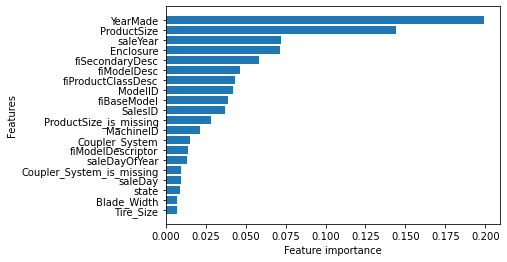

In [67]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [68]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing,UsageBand_is_missing,fiModelDesc_is_missing,fiBaseModel_is_missing,fiSecondaryDesc_is_missing,fiModelSeries_is_missing,fiModelDescriptor_is_missing,ProductSize_is_missing,fiProductClassDesc_is_missing,state_is_missing,ProductGroup_is_missing,ProductGroupDesc_is_missing,Drive_System_is_missing,Enclosure_is_missing,Forks_is_missing,Pad_Type_is_missing,Ride_Control_is_missing,Stick_is_missing,Transmission_is_missing,Turbocharged_is_missing,Blade_Extension_is_missing,Blade_Width_is_missing,Enclosure_Type_is_missing,Engine_Horsepower_is_missing,Hydraulics_is_missing,Pushblock_is_missing,Ripper_is_missing,Scarifier_is_missing,Tip_Control_is_missing,Tire_Size_is_missing,Coupler_is_missing,Coupler_System_is_missing,Grouser_Tracks_is_missing,Hydraulics_Flow_is_missing,Track_Type_is_missing,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,0,0,0,4,47,44,5,5,0,6,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,6,0,0,1989,1,17,1,17,False,True,True,False,False,True,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,0,0,0,0,60,9,6,6,0,6,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1989,1,31,1,31,False,True,True,False,False,True,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,59,0,0,2,50,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,6,0,0,1989,1,31,1,31,False,True,True,False,False,False,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,0,0,0,0,74,9,6,6,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1989,1,31,1,31,False,True,True,False,False,True,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,21,0,0,0,51,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,5,0,0,1989,1,31,1,31,False,True,True,False,False,False,True,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True
